In [1]:
#Problem statement :-

#In this challenge, we need to identify which customers will make a specific transaction in the future, 
#irrespective of the amount of money transacted.

In [2]:
#Important Librariries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

#validation 
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score, GridSearchCV 
from sklearn.metrics import roc_auc_score,confusion_matrix,make_scorer,classification_report,roc_curve,auc, f1_score
import pydotplus
from IPython.display import Image
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

#Model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
import lightgbm as lgb

In [3]:
os.chdir("C:/Users/Harry/Documents/Downloads/santander-customer-transaction-prediction")
os.getcwd()

'C:\\Users\\Harry\\Documents\\Downloads\\santander-customer-transaction-prediction'

In [4]:
#Importing Train Dataset 
train_df=pd.read_csv('train.csv')
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
#Shape of the train dataset
train_df.shape

(200000, 202)

In [6]:
#Summary of the dataset
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


Count of target classes :
 0    179902
1     20098
Name: target, dtype: int64
percentage of count of target classes :
 0    89.951
1    10.049
Name: target, dtype: float64


Text(0, 0.5, 'Index')

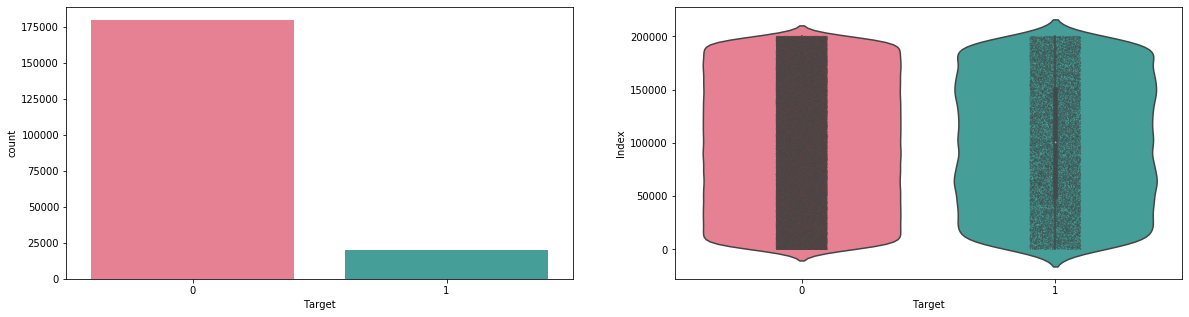

In [7]:
%matplotlib inline
#target classes count
target_class=train_df['target'].value_counts()
print('Count of target classes :\n',target_class)
#Percentage of target classes count
per_target_class=train_df['target'].value_counts()/len(train_df)*100
print('percentage of count of target classes :\n',per_target_class)

#Countplot and violin plot for target classes
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(train_df.target.values,ax=ax[0],palette='husl')
sns.violinplot(x=train_df.target.values,y=train_df.index.values,ax=ax[1],palette='husl')
sns.stripplot(x=train_df.target.values,y=train_df.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='husl')
ax[0].set_xlabel('Target')
ax[1].set_xlabel('Target')
ax[1].set_ylabel('Index')

In [8]:
#Take aways:

#1. We have a unbalanced data,where 90% of the data is the number of customers those will not make a transaction 
#and 10% of the data is those who will make a transaction.

#2. Look at the violin plots seems that there are no relationship between the target with the index of the train dataframe.
#This is more dominated by the zero targets then for the ones.

#3. Look at the jitter plots with violin plots. We can observed that targets looks uniformly distributed over the indexs 
#of the dataframe.

In [9]:
#Distribution of train attributes
def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

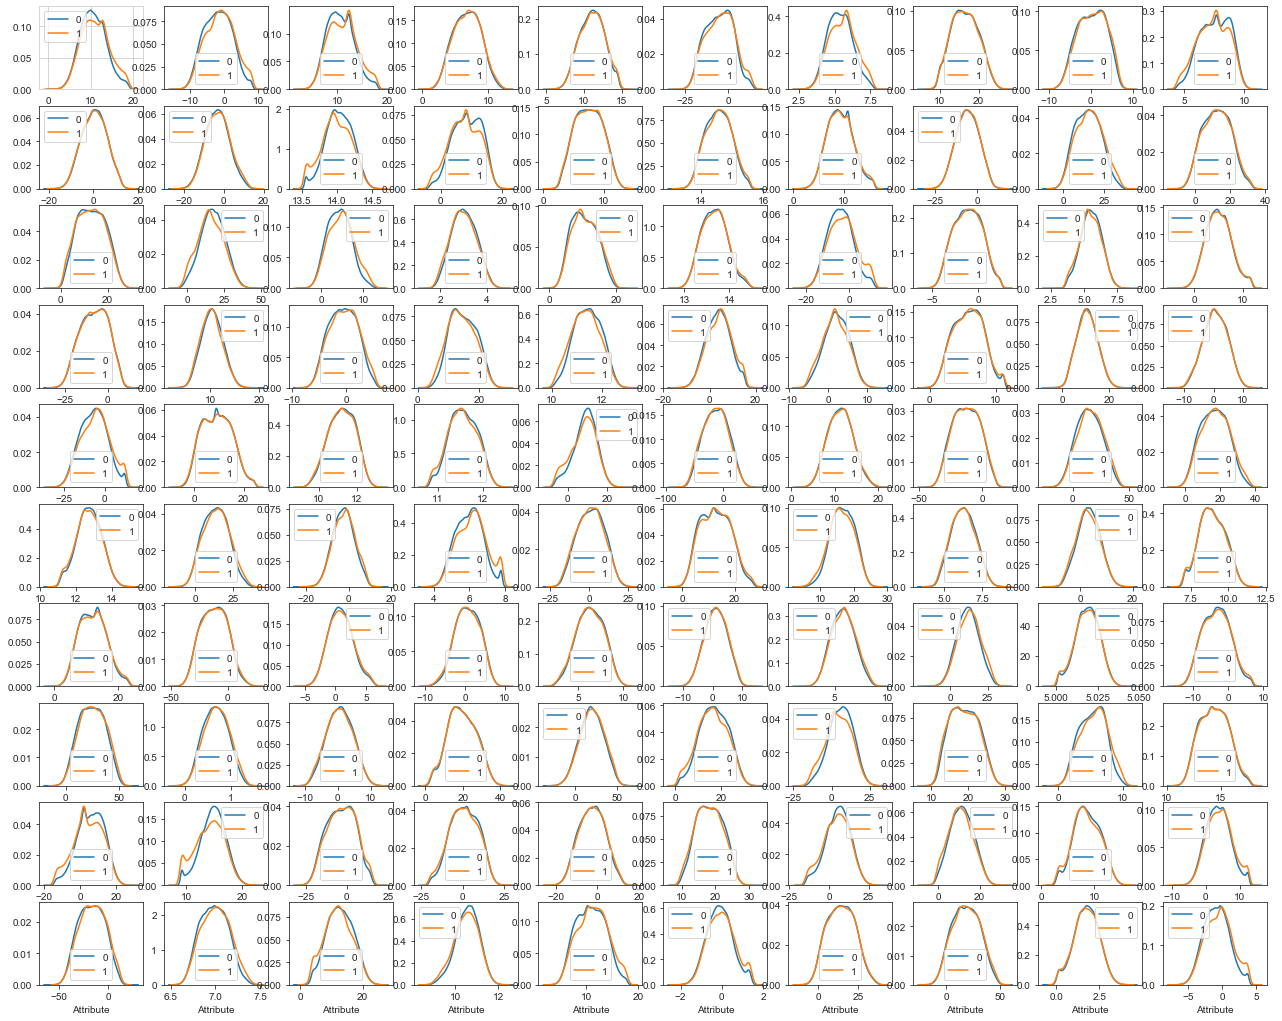

In [10]:
#Let us see first 100 train attributes will be displayed in next cell.

#corresponding to negative class
t0=train_df[train_df.target.values==0]
#corresponding to positive class
t1=train_df[train_df.target.values==1]
#train attributes from 2 to 102
train_attributes=train_df.columns.values[2:102]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

<Figure size 432x288 with 0 Axes>

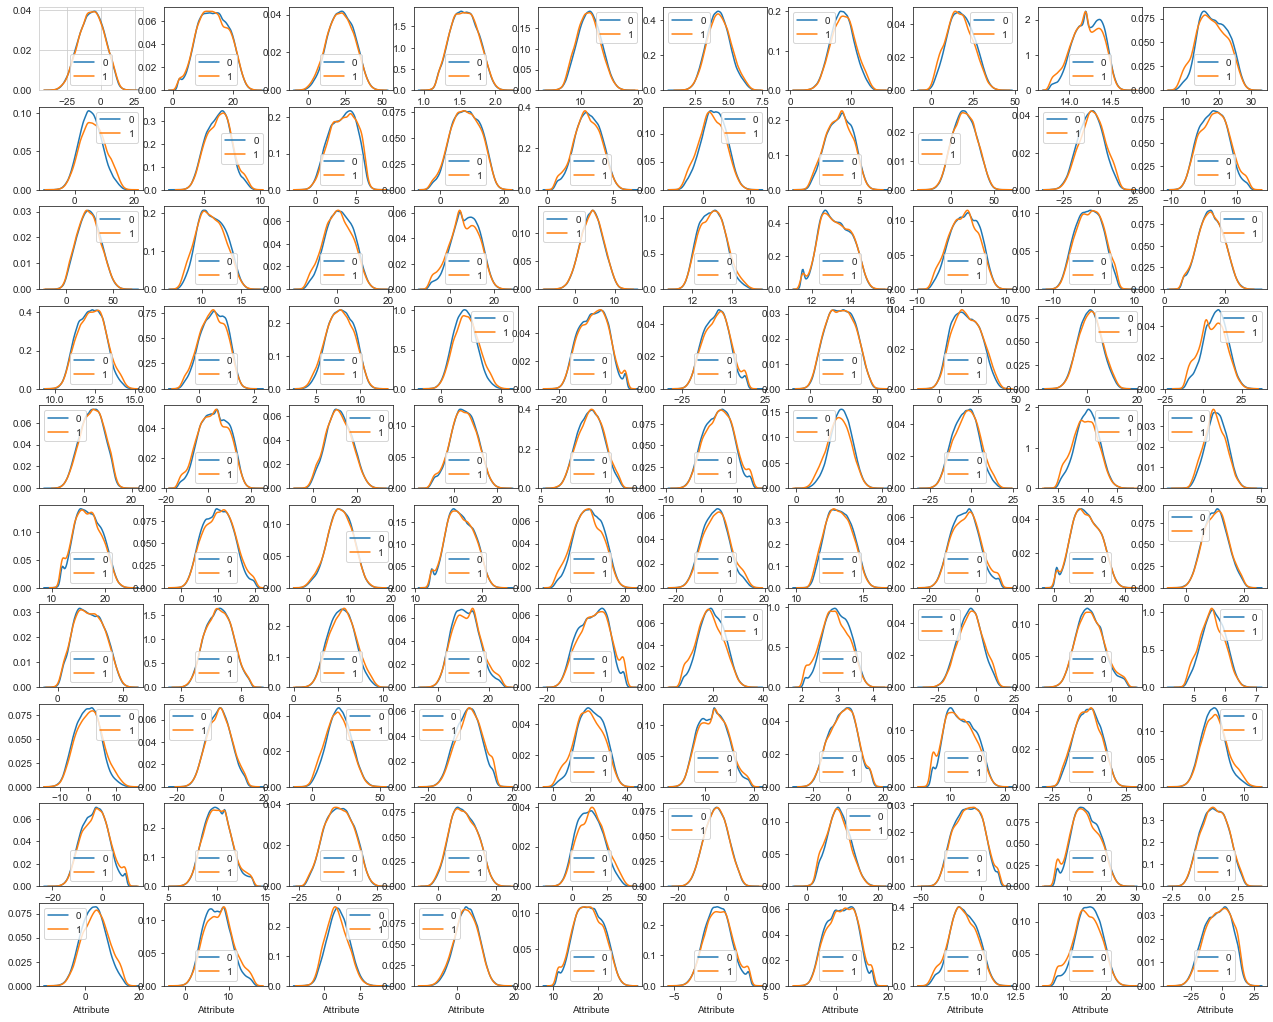

In [11]:
#train attributes from 102 to 203
train_attributes=train_df.columns.values[102:203]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

In [14]:
#Take aways:

#1. We can observed that their is a considerable number of features which are significantly have different distributions
#for two target variables. For example like var_0,var_1,var_9,var_198 var_180 etc.

#2. We can observed that their is a considerable number of features which are significantly have same distributions 
#for two target variables. For example like var_3,var_7,var_10,var_171,var_185 etc.

In [12]:
#importing the test dataset
test_df=pd.read_csv('test.csv')
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [13]:
#Shape of the test dataset
test_df.shape

(200000, 201)

In [14]:
#Distribution of test attributes
def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(test_df[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

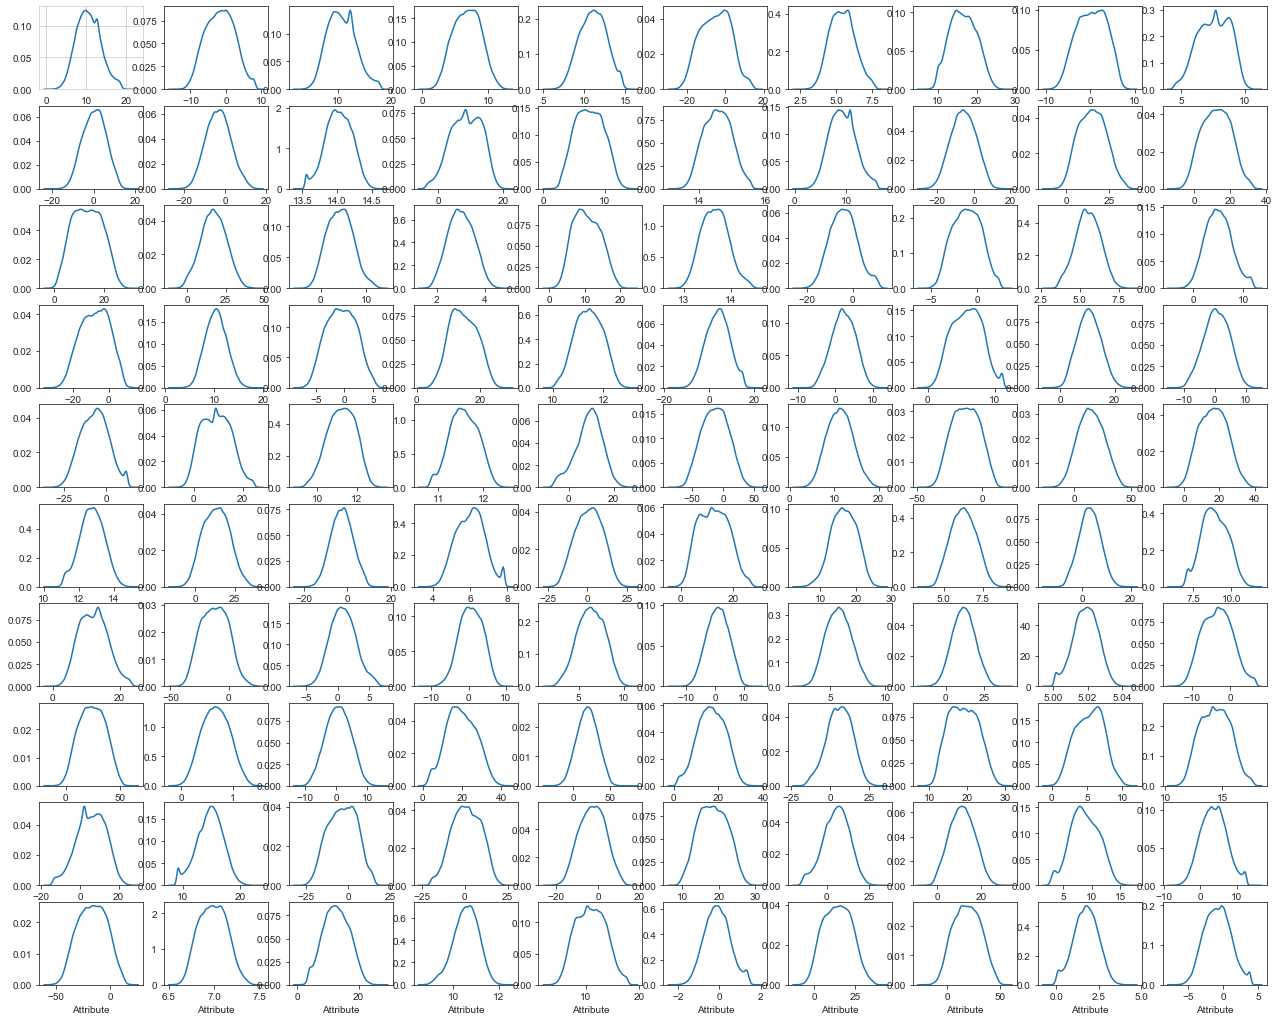

In [15]:
#test attribiutes from 1 to 101
test_attributes=test_df.columns.values[1:101]
#plot distribution of test attributes
plot_test_attribute_distribution(test_attributes)

<Figure size 432x288 with 0 Axes>

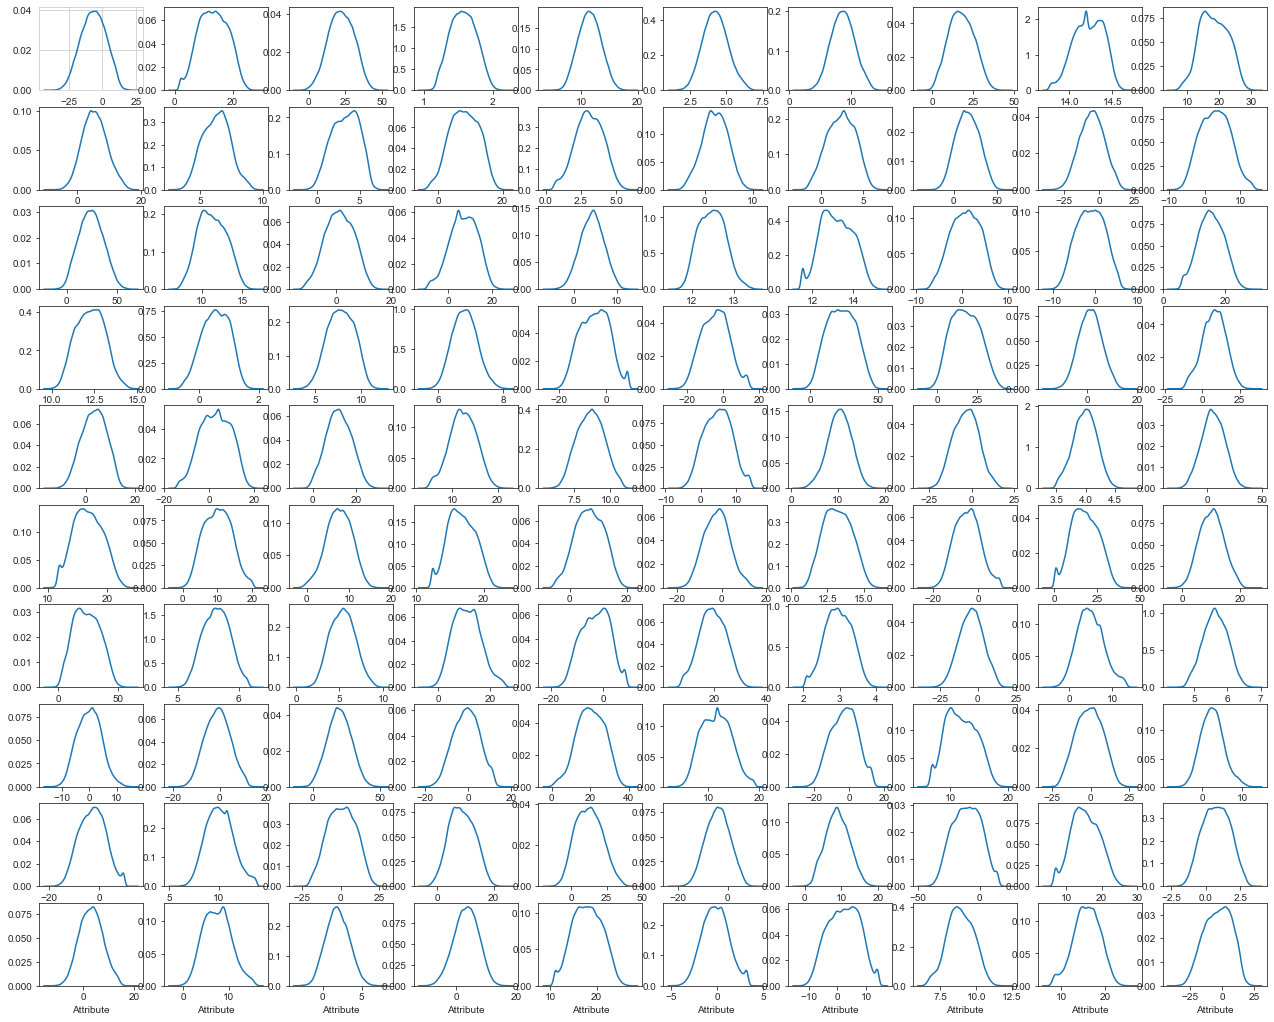

In [16]:
#test attributes from 101 to 202
test_attributes=test_df.columns.values[101:202]
#plot the distribution of test attributes
plot_test_attribute_distribution(test_attributes)

In [20]:
#Take aways:

#1. We can observed that their is a considerable number of features which are significantly have different distributions. 
#For example like var_0,var_1,var_9,var_180 var_198 etc.

#2. We can observed that their is a considerable number of features which are significantly have same distributions. 
#For example like var_3,var_7,var_10,var_171,var_185,var_192 etc.

In [21]:
#Let us look distribution of mean values per rows and columns in train and test dataset

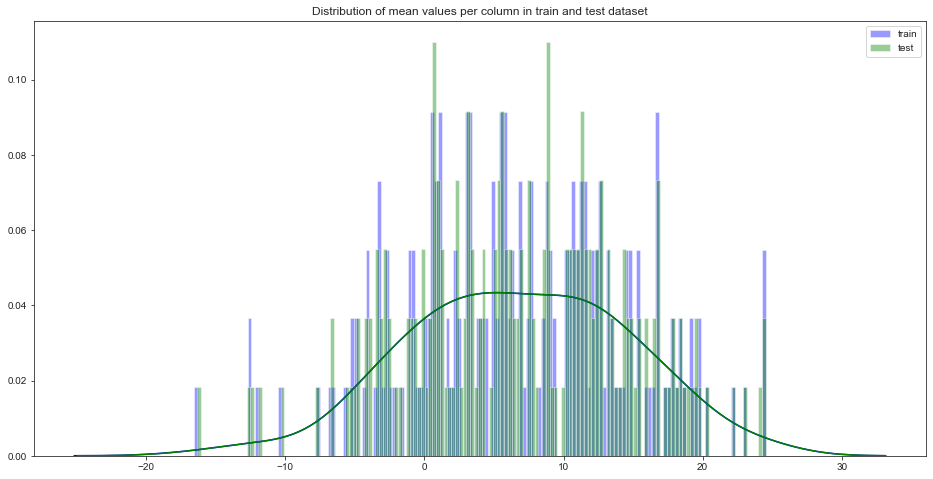

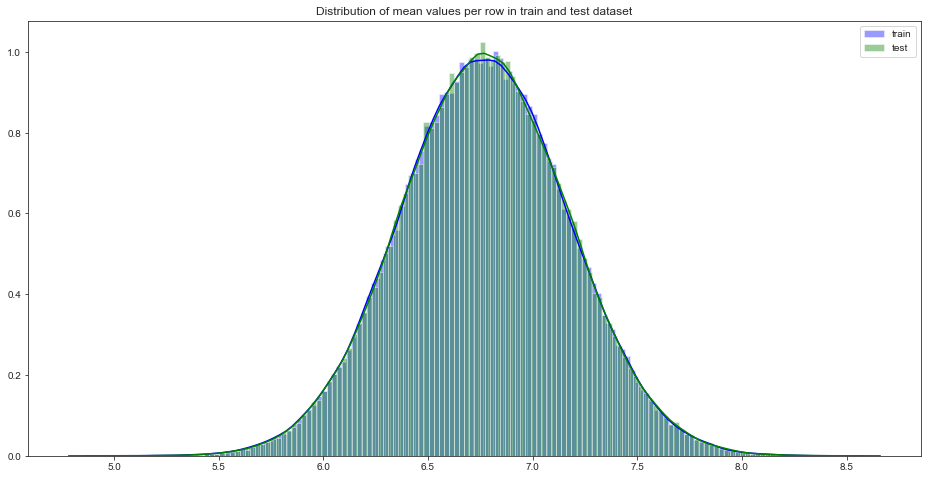

In [17]:
#Distribution of mean values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for mean values per column in train attributes
sns.distplot(train_df[train_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per column in test attributes
sns.distplot(test_df[test_attributes].mean(axis=0),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of mean values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of mean values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for mean values per row in train attributes
sns.distplot(train_df[train_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per row in test attributes
sns.distplot(test_df[test_attributes].mean(axis=1),color='green',kde=True, bins=150, label='test')
plt.title('Distribution of mean values per row in train and test dataset')
plt.legend()
plt.show()


In [23]:
#Let us look distribution of standard deviation(std) values per rows and columns in train and test dataset

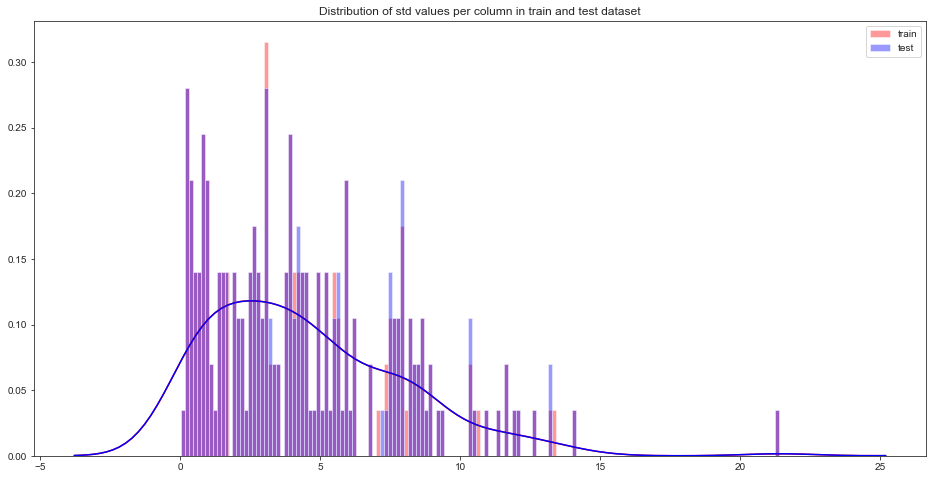

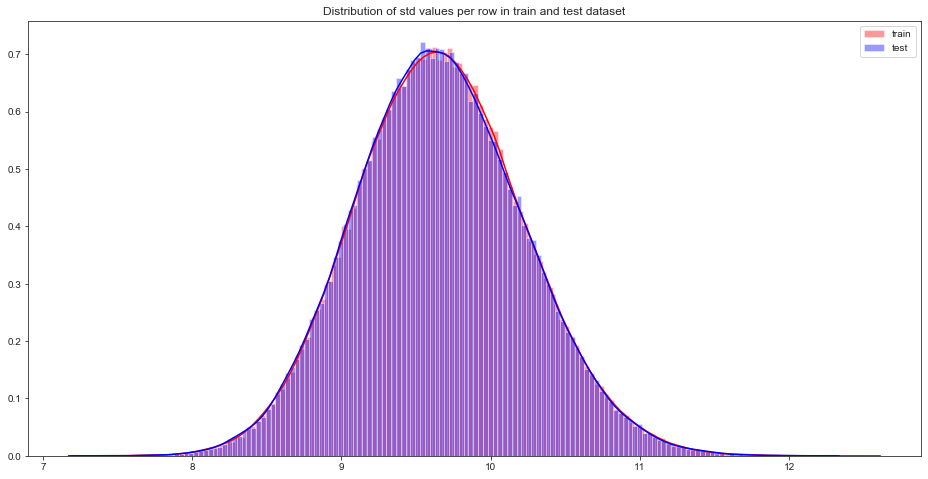

In [18]:
#Distribution of std values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for std values per column in train attributes
sns.distplot(train_df[train_attributes].std(axis=0),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per column in test attributes
sns.distplot(test_df[test_attributes].std(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of std values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of std values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for std values per row in train attributes
sns.distplot(train_df[train_attributes].std(axis=1),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per row in test attributes
sns.distplot(test_df[test_attributes].std(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of std values per row in train and test dataset')
plt.legend()
plt.show()

In [25]:
#Let us look distribution of skewness per rows and columns in train and test dataset

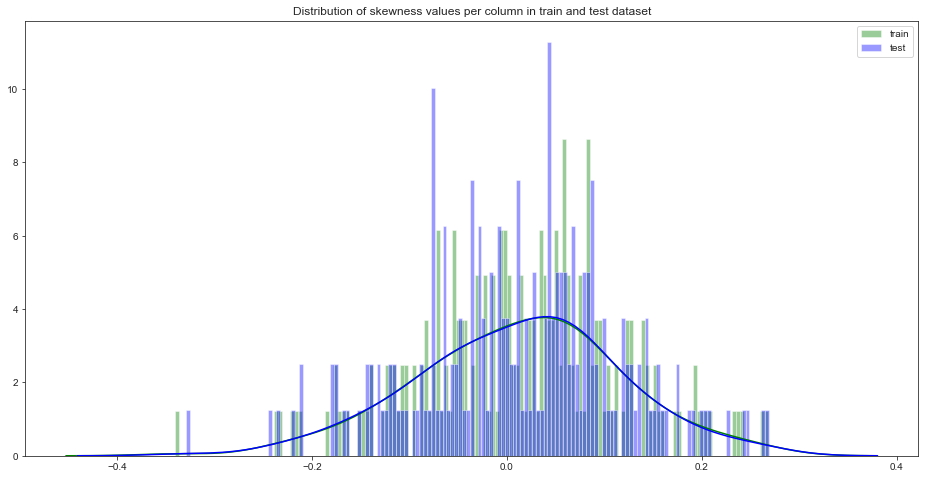

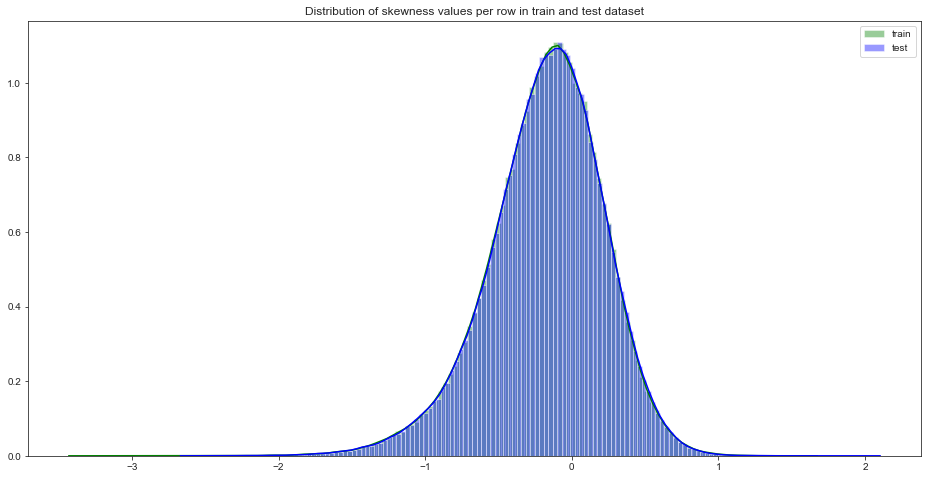

In [19]:
#Distribution of skew values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for skew values per column in train attributes
sns.distplot(train_df[train_attributes].skew(axis=0),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per column in test attributes
sns.distplot(test_df[test_attributes].skew(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of skewness values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of skew values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for skew values per row in train attributes
sns.distplot(train_df[train_attributes].skew(axis=1),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per row in test attributes
sns.distplot(test_df[test_attributes].skew(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of skewness values per row in train and test dataset')
plt.legend()
plt.show()

In [27]:
#Let us look distribution of kurtosis values per rows and columns in train and test dataset

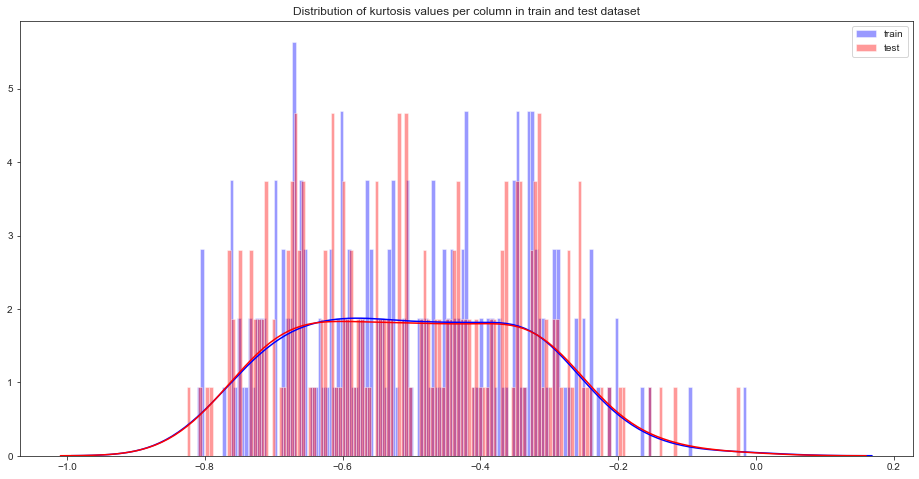

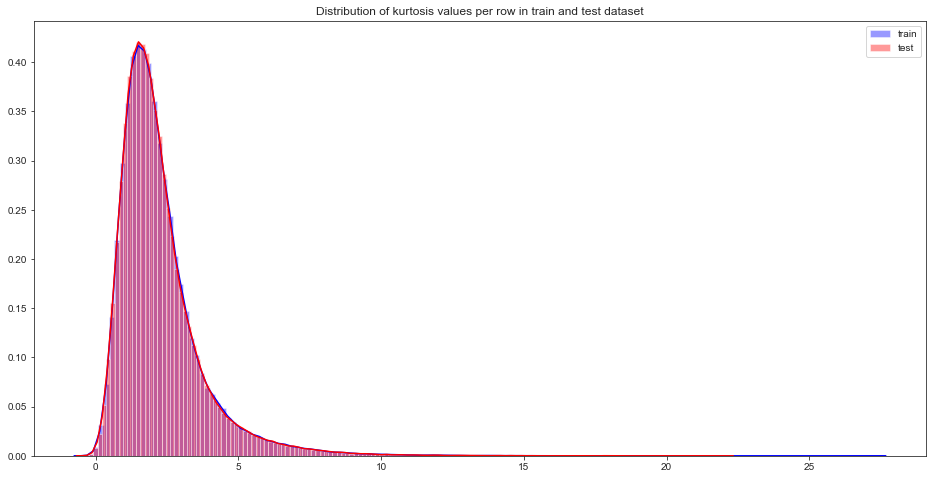

In [20]:
#Distribution of kurtosis values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for kurtosis values per column in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per column in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='test')
plt.title('Distribution of kurtosis values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of kutosis values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for kurtosis values per row in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per row in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=1),color='red',kde=True, bins=150, label='test')
plt.title('Distribution of kurtosis values per row in train and test dataset')
plt.legend()
plt.show()

In [21]:
#Missing Value Analysis 

#Finding the missing values in train and test data
train_missing=train_df.isnull().sum().sum()
test_missing=test_df.isnull().sum().sum()
print('Missing values in train data :',train_missing)
print('Missing values in test data :',test_missing)

#No missing values are present in both train and test data.

Missing values in train data : 0
Missing values in test data : 0


In [30]:
#Correlation between the attributes

In [22]:
#We observed that the correlation between the train attributes is very small.

#Correlations in train attributes
train_attributes=train_df.columns.values[2:202]
train_correlations=train_df[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlations=train_correlations[train_correlations['level_0']!=train_correlations['level_1']]
print(train_correlations.head(10))
print(train_correlations.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844


In [32]:
#We observed that the correlation between the test attributes is very small.

#Correlations in test attributes
test_attributes=test_df.columns.values[1:201]
test_correlations=test_df[test_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlations=test_correlations[test_correlations['level_0']!=test_correlations['level_1']]
print(test_correlations.head(10))
print(test_correlations.tail(10))

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868


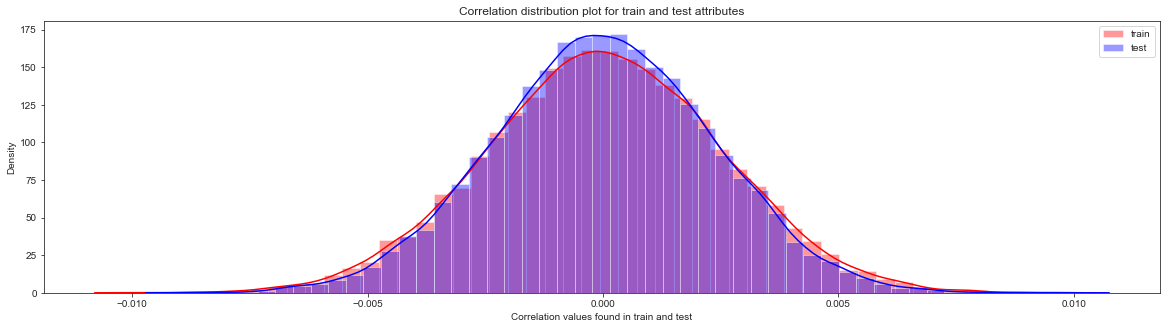

In [23]:
#Correlation plot for train and test data

#We can observed from correlation distribution plot that the correlation between the train and test attributes 
#is very very small, it means that features are independent each other.

#Correlations in train data
train_correlations=train_df[train_attributes].corr()
train_correlations=train_correlations.values.flatten()
train_correlations=train_correlations[train_correlations!=1]
#Correlations in test data
test_correlations=test_df[test_attributes].corr()
test_correlations=test_correlations.values.flatten()
test_correlations=test_correlations[test_correlations!=1]

plt.figure(figsize=(20,5))
#Distribution plot for correlations in train data
sns.distplot(train_correlations, color="Red", label="train")
#Distribution plot for correlations in test data
sns.distplot(test_correlations, color="Blue", label="test")
plt.xlabel("Correlation values found in train and test")
plt.ylabel("Density")
plt.title("Correlation distribution plot for train and test attributes")
plt.legend()

In [24]:
#Feature engineering

#Let us do some feature engineering by using

#1. Permutation importance
#2. Partial dependence plots


In [25]:
#Permutation importance

#Feature Importances in Random forest Classifier 

In [26]:
#training and testing data
X=train_df.drop(columns=['ID_code','target'],axis=1)
test=test_df.drop(columns=['ID_code'],axis=1)
y=train_df['target']

In [27]:
#Let us build simple model to find features which are more important.

#Split the training data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

print('Shape of X_train :',X_train.shape)
print('Shape of X_test :',X_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_test :',y_test.shape)

Shape of X_train : (150000, 200)
Shape of X_test : (50000, 200)
Shape of y_train : (150000,)
Shape of y_test : (50000,)


In [28]:
#Random Forest Classifier 

#Random forest classifier
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
#Let us calculate weights and show important features using eli5 library.

#Permutation importance
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)
#fitting the model
perm_imp.fit(X_test,y_test)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [30]:
#Important features
import eli5
eli5.show_weights(perm_imp,feature_names=X_test.columns.tolist(),top=200)

Weight,Feature
0.0004 ± 0.0002,var_81
0.0003 ± 0.0002,var_146
0.0003 ± 0.0002,var_109
0.0003 ± 0.0002,var_12
0.0002 ± 0.0001,var_110
0.0002 ± 0.0000,var_173
0.0002 ± 0.0001,var_174
0.0002 ± 0.0002,var_0
0.0002 ± 0.0002,var_26
0.0001 ± 0.0001,var_166


In [31]:
#Take aways:

#1. Importance of the features decreases as we move down the top of the column.
#2. As we can see the features shown in green indicate that they have a positive impact on our prediction
#3. As we can see the features shown in white indicate that they have no effect on our prediction
#4. The most important feature is 'Var_81'

In [32]:
#Partial dependence plots

#Partial Dependence Plot help you understand how well your model makes decision 
#In other words how model will respond if you increase or decrease X

#Let us calculate partial dependence plots on random forest

In [33]:
#Let us see impact of the main features which are discovered in the previous section by using the pdpbox.

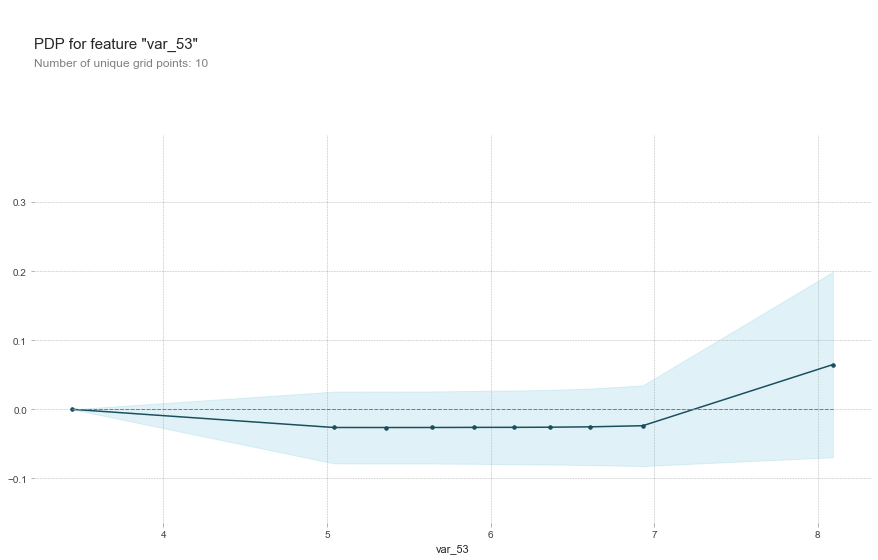

In [55]:
from pdpbox import pdp, get_dataset, info_plots
#Create the data we will plot 'var_53'
features=[v for v in X_test.columns if v not in ['ID_code','target']]
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_test,model_features=features,feature='var_53')
#plot feature "var_53"
pdp.pdp_plot(pdp_data,'var_53')
plt.show()

In [ ]:
#Take aways:

#1. The y_axis does not show the predictor value instead how the value changing with the change in given predictor variable.

#2. The blue shaded area indicates the level of confidence of 'var_53'.

#3. On y-axis having a positive value means for that particular value of predictor variable it is less likely to predict
#   the correct class and having a positive value means it has positive impact on predicting the correct class

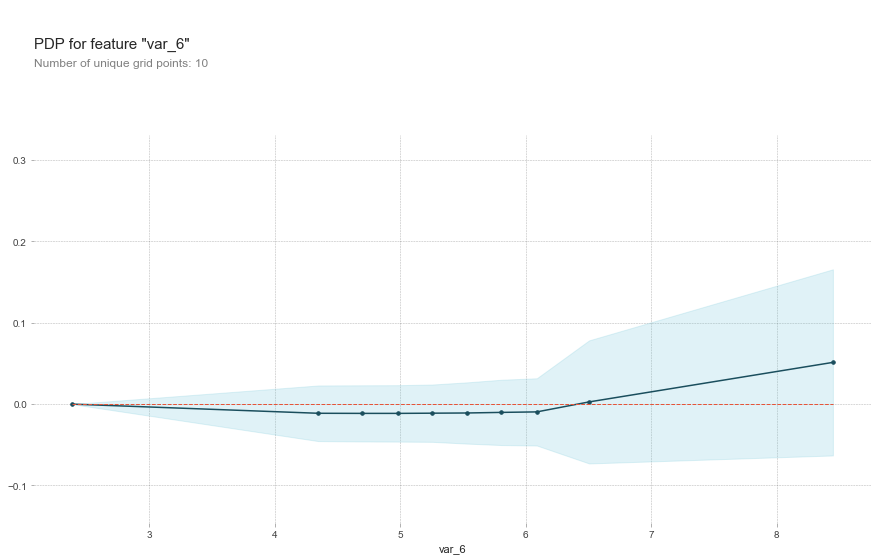

In [56]:
#Create the data we will plot 
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_test,model_features=features,feature='var_6')
#plot feature "var_6"
pdp.pdp_plot(pdp_data,'var_6')
plt.show()

In [ ]:
#Take aways:

#1. The y_axis does not show the predictor value instead how the value changing with the change in given predictor variable.

#2. The blue shaded area indicates the level of confidence of 'var_53'.

#3. On y-axis having a positive value means for that particular value of predictor variable it is less likely to predict
#   the correct class and having a positive value means it has positive impact on predicting the correct class

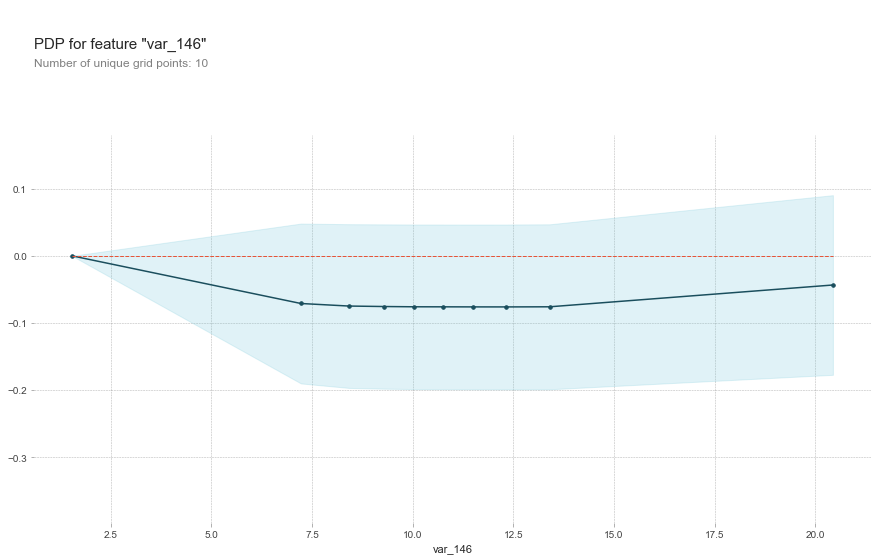

In [57]:
#Create the data we will plot 
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_test,model_features=features,feature='var_146')
#plot feature "var_146"
pdp.pdp_plot(pdp_data,'var_146')
plt.show()

In [ ]:
#Take aways:

#1. The y_axis does not show the predictor value instead how the value changing with the change in given predictor variable.

#2. The blue shaded area indicates the level of confidence of 'var_53'.

#3. On y-axis having a positive value means for that particular value of predictor variable it is less likely to predict
#   the correct class and having a positive value means it has positive impact on predicting the correct class

In [58]:
#Handling of imbalanced data

#Now we are going to explore 5 different approaches for dealing with imbalanced datasets.

#1. Change the performance metric
#2. Oversample minority class
#3. Undersample majority class
#4. Synthetic Minority Oversampling Technique(SMOTE)
#5. Change the algorithm

#Now let us start with simple Logistic regression model

In [34]:
#Split the train data using StratefiedKFold cross validator
from sklearn.model_selection import StratifiedKFold

In [82]:
#Training data
X=train_df.drop(['ID_code','target'],axis=1)
Y=train_df['target']
#StratifiedKFold cross validator
skf=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in skf.split(X,Y):
    X_train, X_test=X.iloc[train_index], X.iloc[test_index]
    y_train, y_test=Y.iloc[train_index], Y.iloc[test_index]

print('Shape of X_train :',X_train.shape)
print('Shape of X_test :',X_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_test :',y_test.shape)


Shape of X_train : (160000, 200)
Shape of X_test : (40000, 200)
Shape of y_train : (160000,)
Shape of y_test : (40000,)


In [36]:
#Logistic regression model
lr_model=LogisticRegression(random_state=42)
#fitting the lr model
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#Accuracy of the model
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of the lr_model :',lr_score)

Accuracy of the lr_model : 0.9122


In [38]:
#Cross validation prediction of lr_model

#Cross validation prediction
cv_predict=cross_val_predict(lr_model,X_test,y_test,cv=5)
#Cross validation score
cv_score=cross_val_score(lr_model,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.9106249999999999


In [39]:
#Accuracy of the model is not the best metric to use when evaluating the imbalanced datasets as it may be misleading. 
#So, we are going to change the performance metric

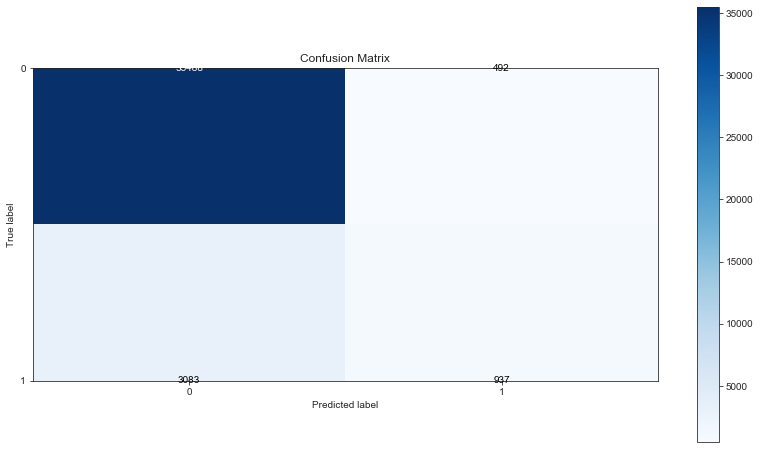

In [43]:
#Confusion matrix
cm=confusion_matrix(y_test,cv_predict)
#Plot the confusion matrix
plot_confusion_matrix(y_test,cv_predict,normalize=False,figsize=(14,8))

AUC score : 0.6097051568173585


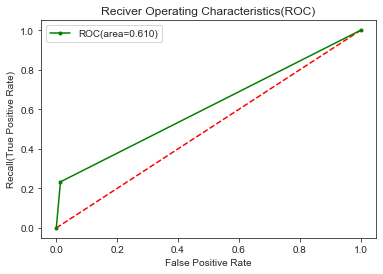

In [44]:
#Reciever operating characteristics (ROC)- Area under curve(AUC) score and curve

#ROC_AUC score
auc = roc_auc_score(y_test,cv_predict)
print('AUC score :',auc)

#ROC_AUC curve
plt.figure()
fpr,tpr,thresholds=roc_curve(y_test,cv_predict)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr, marker = ".", color = "green", label='ROC(area=%0.3f)' %auc)
plt.title('Reciver Operating Characteristics(ROC)')
plt.legend()
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
#When we compare the roc_auc_score and model accuracy , model is not performing well on imbalanced data.

In [45]:
#Classification report
scores=classification_report(y_test,cv_predict)
print(scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.66      0.23      0.34      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



In [74]:
#We can observed that f1 score is high for number of customers those who will not make a transaction then the
#who will make a transaction. So, we are going to change the algorithm.

In [46]:
#Model Performance on test data 

#Predicting the model
X1_test = test_df.drop(['ID_code'],axis=1)
lr_pred = lr_model.predict(X1_test)
print(lr_pred)

[0 0 0 ... 0 0 0]


In [47]:
#Oversample minority class:

#1. It can be defined as adding more copies of minority class.
#2. It can be a good choice when we don't have a ton of data to work with.
#3. Drawback is that we are adding information.This may leads to overfitting and poor performance on test data.

#Undersample majority class:

#1. It can be defined as removing some observations of the majority class.
#2. It can be a good choice when we have a ton of data -think million of rows.
#3. Drawback is that we are removing information that may be valuable.This may leads to underfitting and poor performance 
#   on test data.


#Both Oversampling and undersampling techniques have some drawbacks. So, we are not going to use this models for this problem 
#and also we will use other best algorithms.

In [48]:
#Synthetic Minority Oversampling Technique(SMOTE)

#SMOTE uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model

In [49]:
from imblearn.over_sampling import SMOTE
#Synthetic Minority Oversampling Technique
sm = SMOTE(random_state=42)


#Generating synthetic data points

X_smote,y_smote = sm.fit_sample(X_train,y_train)



In [50]:
#before doing SMOTE Y_train values
y_train.value_counts()


#y_train values after smote
np.bincount(y_smote)

array([143922, 143922], dtype=int64)

In [51]:
#Let us see how baseline logistic regression model performs on synthetic data points.

In [52]:
#Logistic regression model for SMOTE
smote=LogisticRegression(random_state=42)
#fitting the smote model
smote.fit(X_smote,y_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
#Accuracy of the model
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7883645307875099


In [84]:
X_smote_v , y_smote_v = sm.fit_sample(X_test,y_test)

#Cross validation prediction
cv_smote_predict = cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score
cv_smote_score = cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('cross_val_score :',np.average(cv_smote_score))

cross_val_score : 0.7964702612562535


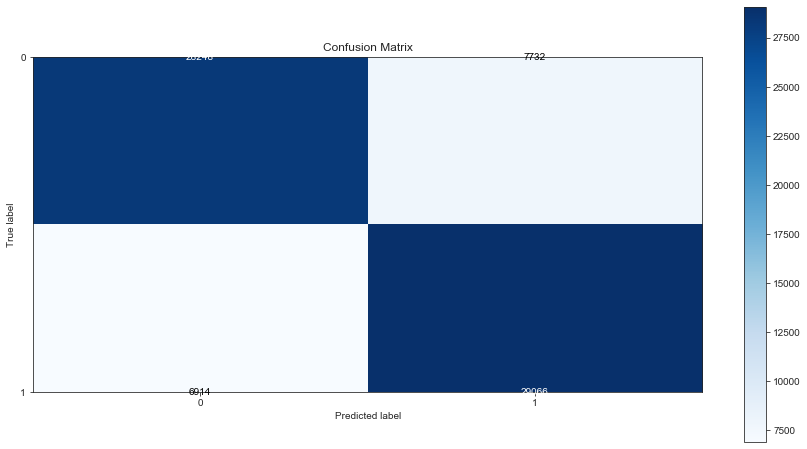

In [55]:
#Confusion matrix
cm=confusion_matrix(y_smote_v,cv_smote_predict)
#Plot the confusion matrix
plot_confusion_matrix(y_smote_v,cv_smote_predict,normalize=False,figsize=(15,8))

AUC score : 0.7964702612562535


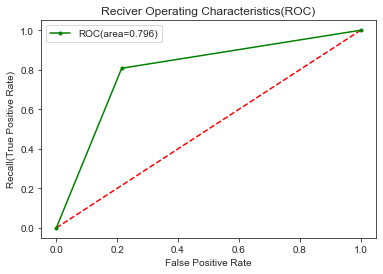

In [56]:
#Reciever operating characteristics (ROC)- Area under curve(AUC) score and curve

#ROC_AUC score
auc = roc_auc_score(y_smote_v,cv_smote_predict)
print('AUC score :',auc)

#ROC_AUC curve
plt.figure()
fpr,tpr,thresholds=roc_curve(y_smote_v,cv_smote_predict)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr, marker = ".", color = "green", label='ROC(area=%0.3f)' %auc)
plt.title('Reciver Operating Characteristics(ROC)')
plt.legend()
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
#Classification report
scores=classification_report(y_smote_v,cv_smote_predict)
print(scores)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



In [58]:
#Predicting the model
X_test = test_df.drop(['ID_code'],axis=1)
smote_pred = smote.predict(X_test)
print(smote_pred)

[1 1 0 ... 0 0 1]


In [59]:
#XGBoost:

#It is an advanced version of gradient boosting method that is designed to focus more on computional speed and model efficiency.

#Let us build XGBoost model

In [60]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [61]:
#Hyper-paramet Optimization

In [62]:
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [63]:
classifier = xgboost.XGBClassifier()

In [105]:
#bst_grid = GridSearchCV(estimator = classifier, param_grid = params, scoring = 'roc_auc')

In [66]:
bst_grid_random = RandomizedSearchCV(estimator = classifier, param_distributions = params, scoring = 'roc_auc')

In [69]:
drid_fit = bst_grid_random.fit(X_train,y_train)

In [70]:
best_clf = drid_fit.best_estimator_

In [71]:
best_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
#fitting the XGBoost Model with hyper parameter tuning 

In [79]:
xg_model = best_clf.fit(X_train,y_train)

In [99]:
#Accuracy of the model
xg_score=xg_model.score(X_train,y_train)
print('Accuracy of the xg_model :',xg_score)

Accuracy of the xg_model : 0.874325


In [ ]:
#Cross validation prediction of Xg_model

#Cross validation prediction
cv_predict_xg=cross_val_predict(xg_model,X_test,y_test,cv=5)
#Cross validation score
cv_score_xg=cross_val_score(xg_model,X_test,y_test,cv=5)

In [85]:
print('cross_val_score :',np.average(cv_score_xg))

cross_val_score : 0.910075


In [ ]:
#Accuracy of the model is not the best metric to use when evaluating the imbalanced datasets as it may be misleading. 
#So, we are going to change the performance metric

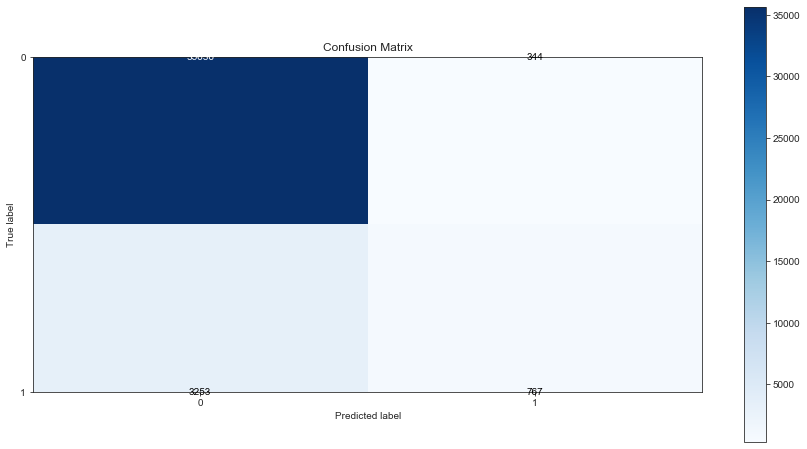

In [86]:
#Confusion matrix
cm_xg = confusion_matrix(y_test,cv_predict_xg)
#Plot the confusion matrix
plot_confusion_matrix(y_test,cv_predict_xg , normalize=False,figsize=(15,8))

In [87]:
cm_xg

array([[35636,   344],
       [ 3253,   767]], dtype=int64)

AUC score : 0.5906175763760408


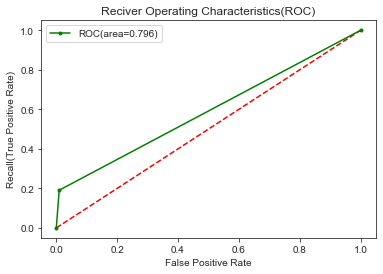

In [88]:
#Reciever operating characteristics (ROC)- Area under curve(AUC) score and curve

#ROC_AUC score
auc_xg = roc_auc_score(y_test,cv_predict_xg)
print('AUC score :',auc_xg)

#ROC_AUC curve
plt.figure()
fpr,tpr,thresholds=roc_curve(y_test,cv_predict_xg)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr, marker = ".", color = "green", label='ROC(area=%0.3f)' %auc)
plt.title('Reciver Operating Characteristics(ROC)')
plt.legend()
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
#Let's Fit model with SMOTE variables 

In [90]:
xg_model_smote = best_clf.fit(X_smote,y_smote)

In [91]:
#Accuracy of the model
xg_score_sm=xg_model_smote.score(X_train,y_train)
print('Accuracy of the xg_model :',xg_score_sm)

Accuracy of the lr_model : 0.874325


In [92]:
#Cross validation prediction of Xg_model_smote

#Cross validation prediction
cv_predict_xgsm=cross_val_predict(xg_model_smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score
cv_score_xgsm=cross_val_score(xg_model_smote,X_smote_v,y_smote_v,cv=5)

In [93]:
print('cross_val_score :',np.average(cv_score_xgsm))

cross_val_score : 0.9099916620344637


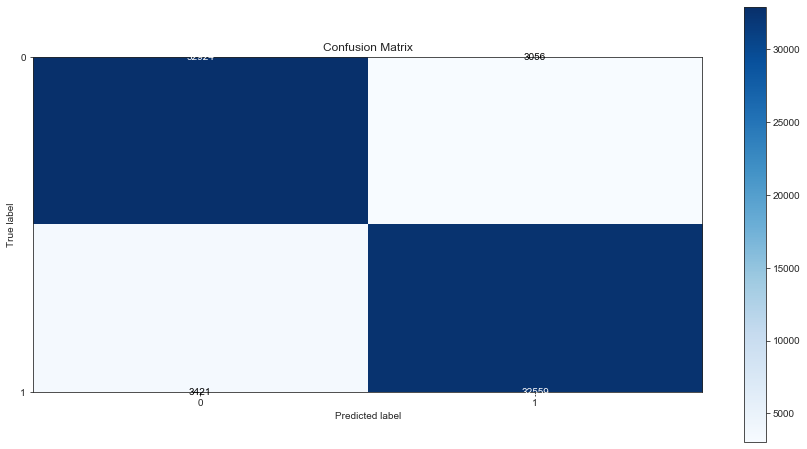

In [94]:
#Confusion matrix
cm_xgsm = confusion_matrix(y_smote_v,cv_predict_xgsm)
#Plot the confusion matrix
plot_confusion_matrix(y_smote_v,cv_predict_xgsm , normalize=False,figsize=(15,8))

In [95]:
cm_xgsm

array([[32924,  3056],
       [ 3421, 32559]], dtype=int64)

AUC score : 0.9099916620344635


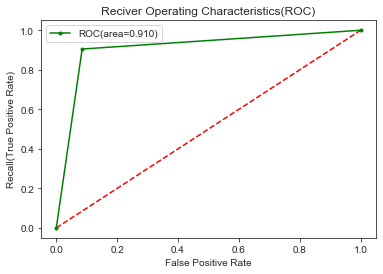

In [97]:
#Reciever operating characteristics (ROC)- Area under curve(AUC) score and curve

#ROC_AUC score
auc_xg = roc_auc_score(y_smote_v,cv_predict_xgsm)
print('AUC score :',auc_xg)

#ROC_AUC curve
plt.figure()
fpr,tpr,thresholds=roc_curve(y_smote_v,cv_predict_xgsm)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr, marker = ".", color = "green", label='ROC(area=%0.3f)' %auc_xg)
plt.title('Reciver Operating Characteristics(ROC)')
plt.legend()
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()

In [98]:
#Classification report
scores=classification_report(y_smote_v,cv_predict_xgsm)
print(scores)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     35980
           1       0.91      0.90      0.91     35980

    accuracy                           0.91     71960
   macro avg       0.91      0.91      0.91     71960
weighted avg       0.91      0.91      0.91     71960



In [102]:
#predicting values on test data 
X_test_xg = test_df.drop(['ID_code'],axis=1)
xgsm_predict = xg_model_smote.predict(X_test_xg)
print(xgsm_predict)

[1 0 0 ... 0 0 1]


In [101]:
#Conclusion : We tried model with logistic regression,smote and Xgboost. But Xgboost model is performing well 
# on imbalanced data compared to other models based on scores of roc_auc_score. We choose XgBoost Model with smote variables 

# as they have 0.91 f1-score, 0.91 ROC_AUC curve, 0.91 precision , 0.91 recall

In [103]:
#final submission
sub_df=pd.DataFrame({'ID_code':test_df['ID_code'].values})
sub_df['xgsm_predict']=xgsm_predict
sub_df.to_csv('submission.csv',index=False)
sub_df.head()

,ID_code,xgsm_predict
0,test_0,1
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
